In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the small dataset file as a pandas dataframe
data = pd.read_csv("small.csv")

In [3]:
def getCount(data):
    
    """contstructor for the transition probability matrix
    
    """
    
    
    N_sa = np.zeros((100,4))
    
    N_sa_sp = np.zeros((100,4,100))
    
    T_sp_sa = np.zeros((100,4,100))
    
    for i in range(len(np.unique(data))-1):
        
        state_data = data[(data['s'] == i+1)]
        
        for j in range(0,4):
            
            action_data = state_data[(state_data['a'] == j+1)]
            
            N_sa[i,j] = len(action_data)
            
            for k in np.unique(action_data['sp']):
                
                N_sa_sp[i,j,k-1] = len(action_data[(action_data['sp'] == k)])
                
                T_sp_sa[i,j,k-1] = N_sa_sp[i,j,k-1] / N_sa[i,j]
                
    return T_sp_sa
            


def Value_iteration(data,T):
    
    """main function to calculate the value associated with each state.
       Accepts dataframe as well as the transition probability matrix.
        
    """
    
    U_old = np.zeros(100)
    #discount factor
    gamma = 0.95
    

    #while process has not converged
    while True:
        
        U_new = np.zeros(100)
        
        # for-loop for every state
        for i in range(100):
            
            #grab all of the data where the state is equal to i
            state_space = data[(data['s'] == i+1)]
            
            save_action_values = []
            
            # for-loop for every action
            for j in range(0,4):
                
                # construct an action dataframe where all state is equal to i 
                # and action is equal to j
                action_space = state_space[(state_space['a'] == j+1)]
                
                # grab reward from this state,action
                reward = float(action_space['r'][0:1])
                
                T_times_U = 0
                
                
                # for each next state that we can visit for one action
                # typically this is 1-value unless there is stochastic policy
                for sp in np.unique(action_space['sp']):
                    
                    sp = sp - 1
                    
                    T_sp_sa = T[i,j,sp]
                    
                    T_times_U += T_sp_sa*U_old[sp]
                              
                save_action_values.append(reward + gamma*T_times_U)          
            
            #update value
            U_new[i] = max(save_action_values)
        
        # find what the largest change in the value function was
        new_theta = max(U_new - U_old)
        
        U_old = U_new
        
        # if there is no change then the value function converged
        if new_theta == 0.0:
            
            return U_old            

In [4]:
# construct T-matrix
T = getCount(data)

In [5]:
U = Value_iteration(data,T)

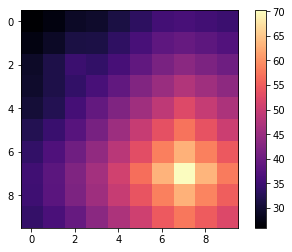

In [6]:
plt.imshow(np.reshape(U,(10,10)),cmap='magma')
plt.colorbar()